In [43]:
# 데이터프레임, 연산 라이브러리
import pandas as pd
import numpy as np

# 파일 불러오기
import json
import pprint
with open('01.아레나mel수집,전처리,라벨링,모델링/Data/song_meta.json', "r", encoding="utf-8") as f:
    jason_data = json.load(f)
    
import pprint    
with open('01.아레나mel수집,전처리,라벨링,모델링/Data/genre_gn_all.json', "r", encoding="utf-8") as g:
    jason_data1 = json.load(g)

# 소요시간, 파일량 알려주는 기능    
from tqdm import tqdm_notebook as tq

# 폴더안 파일 이름 리스트 만들기 위해 시스템 관련 라이브러리 이용
import sys
import os

# 시각화
import matplotlib.pyplot as plt

# 음악 관련 라이브러리 및 시각화
import librosa
import librosa.display

#프레임 전체보기 옵션(전체 보면 느려져서 비활성화)
#pd.set_option('display.max_rows', None)

### Arena 제공 데이터 확인

In [2]:
# Arena Dataset song meta info
df = pd.DataFrame(jason_data)

,song_gn_dtl_gnr_basket,issue_date,album_name,album_id,artist_id_basket,song_name,song_gn_gnr_basket,artist_name_basket,id
0,[GN0901],20140512,불후의 명곡 - 7080 추억의 얄개시대 팝송베스트,2255639,[2727],Feelings,[GN0900],[Various Artists],0
1,"[GN1601, GN1606]",20080421,"Bach : Partitas Nos. 2, 3 & 4",376431,[29966],"Bach : Partita No. 4 In D Major, BWV 828 - II....",[GN1600],[Murray Perahia],1
2,[GN0901],20180518,Hit,4698747,[3361],Solsbury Hill (Remastered 2002),[GN0900],[Peter Gabriel],2
3,"[GN1102, GN1101]",20151016,Feeling Right (Everything Is Nice) (Feat. Popc...,2644882,[838543],Feeling Right (Everything Is Nice) (Feat. Popc...,[GN1100],[Matoma],3
4,"[GN1802, GN1801]",20110824,그남자 그여자,2008470,[560160],그남자 그여자,[GN1800],[Jude Law],4
...,...,...,...,...,...,...,...,...,...
707984,[GN2001],19991219,The Best Best Of The Black President,65254,[166499],Coffin For Head Of State,[GN2000],[Fela Kuti],707984
707985,[GN0901],19860000,True Colors,44141,[11837],Change Of Heart,[GN0900],[Cyndi Lauper],707985
707986,"[GN0105, GN0101]",20160120,행보 2015 윤종신 / 작사가 윤종신 Live Part.1,2662866,[437],스치듯 안녕,[GN0100],[윤종신],707986
707987,"[GN1807, GN1801]",20131217,명상의 시간을 위한 뉴에이지 음악,2221722,[729868],숲의 빛,[GN1800],[Nature Piano],707987


In [5]:
df.loc[:, ['id','song_gn_gnr_basket','song_gn_dtl_gnr_basket']]

,id,song_gn_gnr_basket,song_gn_dtl_gnr_basket
0,0,[GN0900],[GN0901]
1,1,[GN1600],"[GN1601, GN1606]"
2,2,[GN0900],[GN0901]
3,3,[GN1100],"[GN1102, GN1101]"
4,4,[GN1800],"[GN1802, GN1801]"
...,...,...,...
707984,707984,[GN2000],[GN2001]
707985,707985,[GN0900],[GN0901]
707986,707986,[GN0100],"[GN0105, GN0101]"
707987,707987,[GN1800],"[GN1807, GN1801]"


In [33]:
# 장르코드 의미 확인 
jason_data1

{'GN0100': '발라드',
 'GN0101': '세부장르전체',
 'GN0102': "'80",
 'GN0103': "'90",
 'GN0104': "'00",
 'GN0105': "'10-",
 'GN0200': '댄스',
 'GN0201': '세부장르전체',
 'GN0202': "'80",
 'GN0203': "'90",
 'GN0204': "'00",
 'GN0205': "'10-",
 'GN0300': '랩/힙합',
 'GN0301': '세부장르전체',
 'GN0302': '랩 스타일',
 'GN0303': '보컬 스타일',
 'GN0304': '언더그라운드 힙합',
 'GN0305': '시대별',
 'GN0400': 'R&B/Soul',
 'GN0401': '세부장르전체',
 'GN0402': '어반',
 'GN0403': 'R&B',
 'GN0500': '인디음악',
 'GN0501': '세부장르전체',
 'GN0502': '포크',
 'GN0503': '록',
 'GN0504': '일렉',
 'GN0505': '힙합',
 'GN0506': '발라드',
 'GN0507': "'90",
 'GN0508': "'00",
 'GN0509': "'10-",
 'GN0600': '록/메탈',
 'GN0601': '세부장르전체',
 'GN0602': "'70",
 'GN0603': "'80",
 'GN0604': "'90",
 'GN0605': "'00",
 'GN0606': "'10-",
 'GN0700': '성인가요',
 'GN0701': '세부장르전체',
 'GN0702': '신세대트로트',
 'GN0703': '전설의트로트',
 'GN0704': '뽕짝트로트',
 'GN0705': '트로트메들리',
 'GN0706': "트로트'60-'70",
 'GN0707': "트로트'80-'90",
 'GN0708': "트로트'00-",
 'GN0709': "성인가요'80-'90",
 'GN0710': "성인가요'00-",
 'GN0800': '포크/블루스',

### R&B만 모은 파일 불러오기
- 팀내 전처리

In [7]:
RandB = pd.read_csv('01.아레나mel수집,전처리,라벨링,모델링/RandB.csv')

,index,song_gn_dtl_gnr_basket,issue_date,album_name,album_id,artist_id_basket,song_name,song_gn_gnr_basket,artist_name_basket,id
0,11,['GN1301'],20080610,Classic Masters,133952,[104493],Everything We Do (2002 Digital Remaster),GN1300,['Rene & Angela'],11
1,39,"['GN1301', 'GN1308', 'GN1302']",20190802,Jiggy,10313325,[2696540],Jiggy,GN1300,['S.LAY.A'],39
2,52,"['GN1301', 'GN1303']",20180518,Bad Bad News (Ricky`s Vibe Tape) (Feat. Terrac...,10168046,[837217],Bad Bad News (Ricky`s Vibe Tape) (Feat. Terrac...,GN1300,['Leon Bridges'],52
3,57,"['GN1304', 'GN1301', 'GN1302']",20160729,Not Nice,2700431,[727602],Not Nice,GN1300,['PARTYNEXTDOOR'],57
4,71,"['GN1304', 'GN1301']",20110810,Simple Steps,2058451,[614091],Rollercoaster,GN1300,['Sam Ock'],71
...,...,...,...,...,...,...,...,...,...,...
47213,707943,['GN1301'],20170831,New Love,4270665,[2157621],Love For You,GN1300,['Will Soul'],707943
47214,707965,"['GN1301', 'GN1302']",20111021,Swim Good,2022963,[546001],Swim Good,GN1300,['Frank Ocean'],707965
47215,707969,"['GN0401', 'GN0402']",20110902,I Decide (Piano Remix),2010118,[202407],I Decide (Piano Remix),GN0400,['헤리티지(Heritage)'],707969
47216,707976,"['GN1301', 'GN1302']",20181018,Colors Compilation,2692383,[967093],Everybody (Just Bounce),GN1300,['Vbnd'],707976


### 707,989곡 npy파일 중  R&B 47,218곡 선별하고 나머지 파일 삭제

In [17]:
file_list = os.listdir('01.아레나mel수집,전처리,라벨링,모델링/arena')
len(file_list)# 47,218 개 현재 숫자는 이미 담아진 상태임
# 47,219 로 길이 나오는 것은 실제 npy 아닌 'desktop.ini' 파일 1개가 있어서임

47219

In [29]:
non_id_list = []
for i in tq(file_list[:-1]):
    non_id_list.append(i)
len(non_id_list)

<ipython-input-29-0824eff8aa12>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tq(file_list[:-1]):


47218

In [31]:
# 실제 폴더에 있는 id 
non_rnb_list = []
for i in tq(non_id_list):    
    non_rnb = np.load('01.아레나mel수집,전처리,라벨링,모델링/arena/{}'.format(i))
    non_rnb_list.append(non_rnb)
    np.set_printoptions(threshold=np.inf) 

non_id_list

<ipython-input-31-44d198e8f436>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tq(non_id_list):


['100007.npy',
 '100016.npy',
 '100058.npy',
 '100060.npy',
 '100063.npy',
 '100064.npy',
 '100073.npy',
 '100074.npy',
 '100105.npy',
 '100107.npy',
 '100123.npy',
 '100133.npy',
 '100155.npy',
 '100164.npy',
 '100175.npy',
 '100179.npy',
 '100196.npy',
 '10020.npy',
 '100206.npy',
 '100219.npy',
 '100231.npy',
 '100240.npy',
 '100270.npy',
 '100272.npy',
 '100275.npy',
 '100293.npy',
 '100300.npy',
 '100327.npy',
 '100331.npy',
 '100333.npy',
 '100335.npy',
 '100361.npy',
 '100376.npy',
 '100379.npy',
 '100394.npy',
 '10043.npy',
 '100448.npy',
 '100456.npy',
 '100466.npy',
 '100477.npy',
 '100488.npy',
 '100516.npy',
 '100521.npy',
 '100551.npy',
 '100561.npy',
 '100564.npy',
 '100569.npy',
 '10057.npy',
 '100576.npy',
 '100603.npy',
 '10061.npy',
 '100628.npy',
 '100648.npy',
 '100688.npy',
 '1007.npy',
 '100702.npy',
 '100733.npy',
 '100734.npy',
 '100735.npy',
 '100763.npy',
 '100765.npy',
 '100770.npy',
 '10078.npy',
 '100793.npy',
 '100794.npy',
 '100827.npy',
 '10083.npy',
 '1

In [32]:
# 각자 컴퓨터에 가지고 있던 npy 이름에 해당하게 프레임 인덱스 조정, 삭제
#RandB.drop(RandB[RandB.index <9673].index, inplace = True)
#RandB.drop(RandB[RandB.index >19337].index, inplace = True)

In [33]:
# 데이터프레임에 있는 id
id_list = []
for i in range(RandB['id'].size):
    id_list.append(RandB.iloc[i,9])
    np.set_printoptions(threshold=np.inf) 
id_list[-1]

707980

In [ ]:
# 데이터 프레임에 있는 것데 폴더에 없는 것 리스트 만들어주기
non_file_list=[]
for i in tq(range(0,len(id_list))):
    for j in range(0, len(file_list)):
        if id_list[i]!=file_list[j]:
            non_file_list.append(file_list[j])

In [ ]:
for i in tq(range(0,len(non_id_list))):
    for j in range(0,len(id_list)):
        if non_id_list[i]==id_list[j]:
            del non_id_list[i]
    np.set_printoptions(threshold=np.inf)   

non_id_list

In [ ]:
# R&B 아닌 파일 제거 - 실행전파일 백업
import os
for i in tq(range(0,len(non_id_list))):    
    remove_file = ('01.아레나mel수집,전처리,라벨링,모델링/arena/{}.npy'.format(non_id_list[i]))
    if os.path.exists(remove_file):
        os.remove(remove_file)

### 파일 이동하면서 플젝 중간에 파일갯수 매칭 안됐던것 찾는 코드

In [ ]:
mel_list = []
for i in tq(id_list):    
    mel = np.load('mel574000/{}.npy'.format(i))
    mel_list.append(mel)
len(mel_list)

In [ ]:
for i in tq(range(0,len(non_id_list))):
    for j in range(0,len(id_list)):
        if non_id_list[i]==id_list[j]:
            del non_id_list[i]
    np.set_printoptions(threshold=np.inf)   

for i in tq(range(0,len(non_id_list))):    
    remove_file = ('mel574000/{}.npy'.format(non_id_list[i]))
    if os.path.exists(remove_file):
        os.remove(remove_file)

### Mel-spectrogram npy 형식 확인하기

In [37]:
mel_spectrogram = np.load('01.아레나mel수집,전처리,라벨링,모델링/arena/11.npy')

array([[-3.43616557e+00,  1.91131473e+00,  1.97874439e+00,
         1.86329865e+00,  1.96648061e+00,  2.01558208e+00,
         1.98291397e+00,  2.24748516e+00,  1.48466218e+00,
         1.98411608e+00,  1.91187847e+00,  2.25817013e+00,
         1.71219599e+00,  2.26781201e+00,  2.19771123e+00,
         2.14150429e+00,  1.98414195e+00,  1.88925588e+00,
         2.09698796e+00,  1.97693002e+00,  2.14424133e+00,
         1.97045350e+00,  1.52901947e+00,  1.80947316e+00,
         1.93815386e+00,  2.21718526e+00,  2.09524274e+00,
         1.38192022e+00,  1.52879083e+00,  1.27528441e+00,
         1.67473578e+00,  1.80972052e+00,  5.70669889e-01,
         1.14172864e+00,  1.10416532e+00,  1.38798630e+00,
         5.72394192e-01,  1.05048323e+00,  6.02918863e-01,
         4.23435032e-01,  5.99902160e-02,  1.90271949e-03,
         9.18530002e-02,  1.67024538e-01,  4.08053458e-01,
        -3.52561414e-01, -2.80965418e-01, -5.69938064e-01,
        -5.61778367e-01, -5.11377275e-01, -5.84791124e-0

In [39]:
# 멜데이터 차원 확인
mel_spectrogram.shape

(48, 1876)

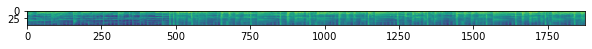

In [42]:
# 멜 이미지 시각화
plt.figure(figsize=(10, 4))
plt.imshow(mel_spectrogram)

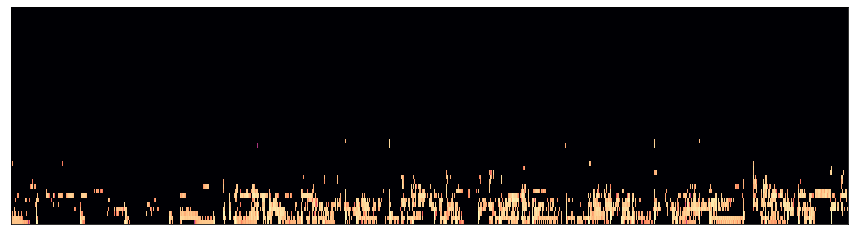

In [49]:
# 아레나  원본 파일을 이미지로 변환할때

plt.figure(figsize=(15, 4))
librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max), sr=16000, hop_length=256)
plt.show()
